In [1]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from openml import setups, flows
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=4, rc={"lines.markersize": 15})
plt.rc('hatch', color='white', linewidth=4)
plt.rcParams.update({
    "font.family": "serif",
     "font.serif": [] ,
      "font.sans-serif": []  })

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]
OTHER_COLOR = sns.color_palette()[2]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results'

output_directory = WRITE_DIRECTORY_ROOT + '/openml/warmstarting'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [2]:
MODE = 'remote'
result_folder = ROOT_RESULT_FOLDER + '/' + MODE + '/warmstarting/openml'
result_file = result_folder + '/cloud-41/2019-10-16/14-34.csv'

In [3]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'pipeline', 'setup', 'type', 'warmstart', 'mat_budget','score', 'total_run_time'
]

method_map = {'optimized': 'CO', 'baseline': 'OML'}
execution_times = pd.read_csv(result_file, header=None, names=HEADERS)

execution_times['cumulative_run_time'] = execution_times.groupby(['exp_id', 'type','mat_budget'])['total_run_time'].apply(lambda x: x.cumsum())
execution_times['mat_budget'] = execution_times['mat_budget'] / (1024. * 1024.)
execution_times['workload'] = execution_times.groupby(['exp_id', 'type','mat_budget']).cumcount() + 1
execution_times['type'] = execution_times['type'].replace(method_map)


In [4]:
execution_times['type'] = ['CO+W' if (x['type'] == 'CO') and (x['warmstart'] == True) else x['type'] for i,x in execution_times[['type','warmstart']].iterrows()]


In [5]:
execution_times['type'] = ['CO-W' if (x['type'] == 'CO') and (x['warmstart'] == False) else x['type'] for i,x in execution_times[['type','warmstart']].iterrows()]


In [11]:
def plot_executions_time(df,loc=None):
    plt.figure(figsize=(7,4))
    plot = sns.lineplot(
        data=df,
        x='workload',
        y='cumulative_run_time',
        hue='type',
        style='type',
        lw=3,
        hue_order=['CO+W','OML','CO-W'],
        dashes={
            'CO+W': (1, 0),
            'OML': (1, 1),
            'CO-W': (2, 1),
        },
         palette={
            'CO+W': SYSTEM_COLOR,
            'OML': BASELINE_COLOR,
            'CO-W': OTHER_COLOR
        },
        legend='brief')

    legend = plt.legend(
            loc='upper left',
            handletextpad=0.1,
            labelspacing=0.0,
            bbox_to_anchor=(-.08, 1.3))
    legend.texts[0].set_text("")
    for line in legend.get_lines():
        line.set_linewidth(3.0)
    plot.set_xlabel('OpenML Workload', fontsize=30)
    plot.set_ylabel('Cumulative Run Time (s)', fontsize=30)
    plt.tick_params(labelsize=30)
    lg = plt.legend(
        loc='upper center',
        handlelength=1.5,
        handletextpad=0.1,
        fontsize=28,
        ncol=3,
        columnspacing=0.5,
        bbox_to_anchor=(0.55, 1.2))
    handles = lg.legendHandles
    labels = ['CO+W','OML','CO-W']
    del handles[0]
#     from matplotlib.lines import Line2D
#     handles[0] = Line2D([0], [1],
#                         color=SYSTEM_COLOR,
#                         linewidth=4,
#                         dashes=(1, 0),
#                         marker="o")
#     handles[1] = Line2D([0], [1],
#                         color=BASELINE_COLOR,
#                         linewidth=4,
#                         dashes=(1, 1),
#                         marker="^")
#     handles[2] = Line2D([0], [1],
#                         color=ALL_COLOR,
#                         linewidth=4,
#                         dashes=(2, 1),
#                         marker="v")
    legend = plt.legend(
        handles,
        labels,
        loc='upper center',
        handlelength=1.5,
        handletextpad=0.05,
        fontsize=32,
        numpoints=1,
        ncol=3,
        columnspacing=0.5,
        bbox_to_anchor=(0.55, 1.25))
    plot.set_yticks([0, 200, 400, 600, 800])
    plot.yaxis.set_major_formatter(ticker.EngFormatter(sep=''))
    for line in legend.get_lines():
        line.set_linewidth(4.0)
    if loc is not None:
        plt.savefig(loc, bbox_inches='tight')

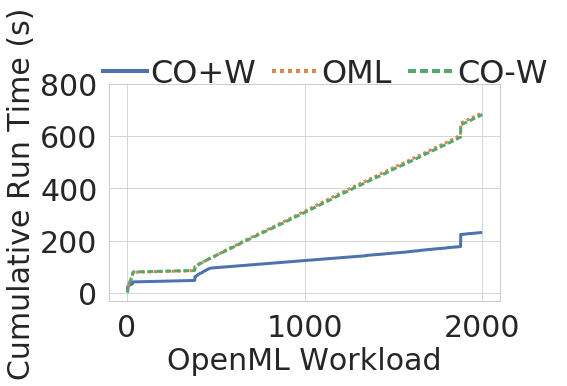

In [12]:
plot_executions_time(execution_times, output_directory+'/warmstarting.pgf')

In [136]:
CO = execution_times[execution_times.type == 'CO-W']

In [142]:
CO.sort_values('total_run_time', ascending=False).head()

,timestamp,exp_id,repo,pipeline,setup,type,warmstart,mat_budget,score,total_run_time,cumulative_run_time,workload
5878,15:02:30,55D1374B,openml,6952,3911053,CO-W,False,2.0,0.71,46.194870,642.409205,1879
4004,15:02:30,55D1374B,openml,5914,44102,CO-W,False,2.0,0.70,19.652254,25.633977,5
4382,15:02:30,55D1374B,openml,6954,2642150,CO-W,False,2.0,0.70,13.192007,99.751622,383
4030,15:02:30,55D1374B,openml,5995,216723,CO-W,False,2.0,0.72,6.061020,70.583686,31
4031,15:02:30,55D1374B,openml,5804,216724,CO-W,False,2.0,0.79,3.788750,74.372436,32


In [144]:
execution_times[execution_times.type =='CO-W'].tail()

,timestamp,exp_id,repo,pipeline,setup,type,warmstart,mat_budget,score,total_run_time,cumulative_run_time,workload
5995,15:02:30,55D1374B,openml,6969,3938732,CO-W,False,2.0,0.80,0.273452,681.269585,1996
5996,15:02:30,55D1374B,openml,6969,3938736,CO-W,False,2.0,0.76,0.445437,681.715022,1997
5997,15:02:30,55D1374B,openml,6969,3939022,CO-W,False,2.0,0.77,0.362423,682.077445,1998
5998,15:02:30,55D1374B,openml,6969,3939128,CO-W,False,2.0,0.77,0.275945,682.353390,1999
5999,15:02:30,55D1374B,openml,6969,3939524,CO-W,False,2.0,0.78,0.280056,682.633446,2000


In [145]:
execution_times[execution_times.type =='CO+W'].tail()

,timestamp,exp_id,repo,pipeline,setup,type,warmstart,mat_budget,score,total_run_time,cumulative_run_time,workload
1995,14:34:22,0AA81BC8,openml,6969,3938732,CO+W,True,2.0,0.79,0.053851,230.837268,1996
1996,14:34:22,0AA81BC8,openml,6969,3938736,CO+W,True,2.0,0.79,0.054040,230.891308,1997
1997,14:34:22,0AA81BC8,openml,6969,3939022,CO+W,True,2.0,0.79,0.054048,230.945356,1998
1998,14:34:22,0AA81BC8,openml,6969,3939128,CO+W,True,2.0,0.74,0.053371,230.998727,1999
1999,14:34:22,0AA81BC8,openml,6969,3939524,CO+W,True,2.0,0.75,0.053939,231.052666,2000


In [146]:
execution_times[execution_times.type =='OML'].tail()

,timestamp,exp_id,repo,pipeline,setup,type,warmstart,mat_budget,score,total_run_time,cumulative_run_time,workload
3995,14:50:47,B2CF354E,openml,6969,3938732,OML,True,1.0,0.80,0.273975,688.664347,1996
3996,14:50:47,B2CF354E,openml,6969,3938736,OML,True,1.0,0.76,0.442746,689.107093,1997
3997,14:50:47,B2CF354E,openml,6969,3939022,OML,True,1.0,0.77,0.363005,689.470098,1998
3998,14:50:47,B2CF354E,openml,6969,3939128,OML,True,1.0,0.77,0.277489,689.747587,1999
3999,14:50:47,B2CF354E,openml,6969,3939524,OML,True,1.0,0.78,0.279330,690.026917,2000
